# Image Conversion and Morphological Operations  

This notebook demonstrates how to process images through multiple steps:  
1. **RGB → Grayscale Conversion**  
2. **Grayscale → Black & White (Fixed Thresholding)**  
3. **Morphological Operations (Erosion & Dilation)**  

We will apply these steps to two different images and visualize the results side by side.  

---

## 🔹 Step 1: RGB to Grayscale  

A grayscale image represents each pixel with a single intensity value (0–255), instead of three channels (R, G, B).  

\[
Gray(x,y) = 0.299 \times R + 0.587 \times G + 0.114 \times B
\]

---

## 🔹 Step 2: Grayscale to Black & White (Thresholding)  

Thresholding converts grayscale to binary (black & white).  
Each pixel is classified as either **0 (black)** or **255 (white)** based on a threshold value **T**.  

\[
BW(x,y) = 
\begin{cases} 
255 & \text{if } Gray(x,y) \geq T \\  
0 & \text{if } Gray(x,y) < T  
\end{cases}
\]

---

## 🔹 Step 3: Morphological Operations  

Morphological operations modify the shape of white objects in a binary image using a **structuring element (kernel)**.  
Here, we use a **square kernel** of size \(5 \times 5\).  

### ➤ Erosion  
Erosion shrinks white regions by removing pixels at object boundaries.  

\[
(A \ominus B)(x,y) = \min_{(i,j) \in B} A(x+i, y+j)
\]

### ➤ Dilation  
Dilation expands white regions by adding pixels to object boundaries.  

\[
(A \oplus B)(x,y) = \max_{(i,j) \in B} A(x+i, y+j)
\]

---

## 🔹 Visualization  

For each image, we will show the results in the following order:  

1. **Original RGB Image**  
2. **Grayscale Image**  
3. **Black & White (Thresholding)**  
4. **Erosion Result**  
5. **Dilation Result**  

Each image will be displayed side by side for comparison.  


## Import Libraries and Images

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- Read Two Images ---
image1 = cv2.imread("assets/Coin.png")  # replace with actual path
image2 = cv2.imread("assets/Generative AI.png")

## Converting Image with Color Conversion and Morphological Operation

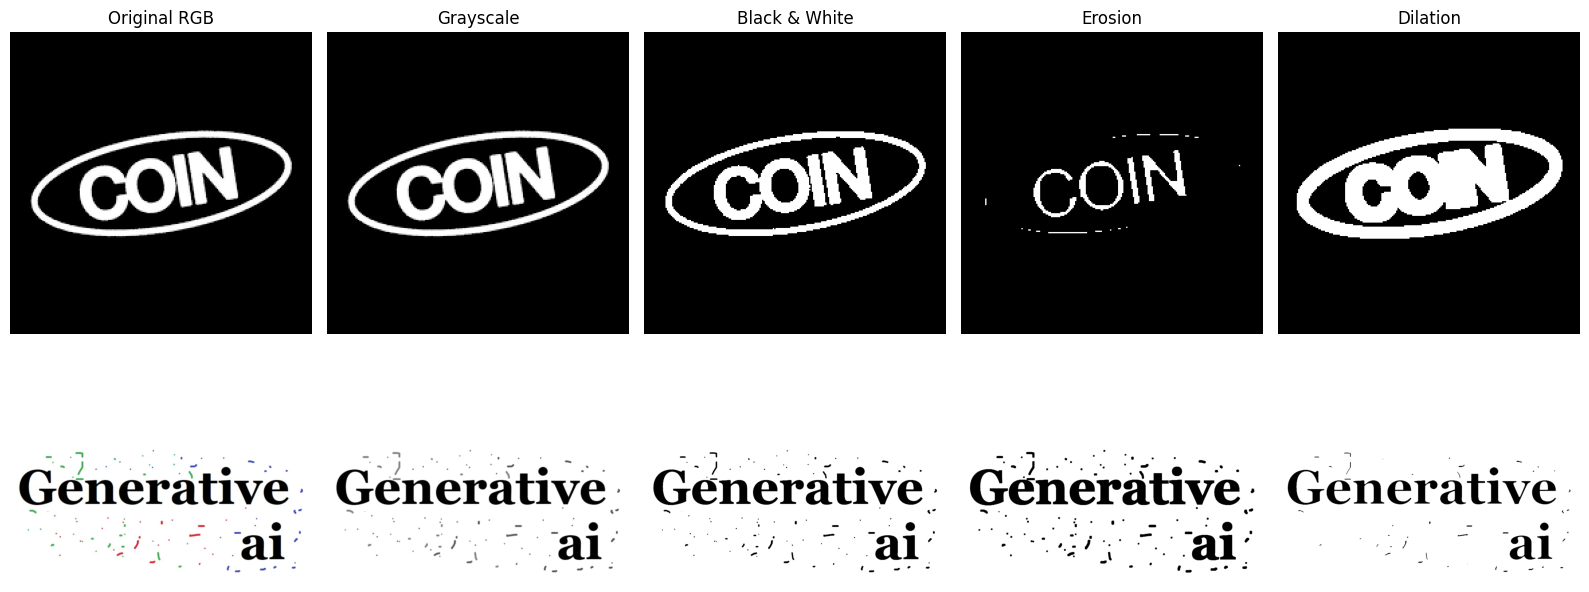

In [2]:
# Function for processing pipeline
def process_image(image, T=150, kernel_size=5):
    # Convert to Grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Fixed Thresholding (Black & White)
    _, bw = cv2.threshold(gray, T, 255, cv2.THRESH_BINARY)
    
    # Define Square Kernel
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    
    # Erosion
    erosion = cv2.erode(bw, kernel, iterations=1)
    
    # Dilation
    dilation = cv2.dilate(bw, kernel, iterations=1)
    
    return gray, bw, erosion, dilation

# Process both images
gray1, bw1, erosion1, dilation1 = process_image(image1)
gray2, bw2, erosion2, dilation2 = process_image(image2)

# --- Visualization ---
fig, axes = plt.subplots(2, 5, figsize=(16, 8))

# Titles
titles = ["Original RGB", "Grayscale", "Black & White", "Erosion", "Dilation"]

# Image 1 visualizations
axes[0,0].imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
axes[0,1].imshow(gray1, cmap="gray")
axes[0,2].imshow(bw1, cmap="gray")
axes[0,3].imshow(erosion1, cmap="gray")
axes[0,4].imshow(dilation1, cmap="gray")

# Image 2 visualizations
axes[1,0].imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
axes[1,1].imshow(gray2, cmap="gray")
axes[1,2].imshow(bw2, cmap="gray")
axes[1,3].imshow(erosion2, cmap="gray")
axes[1,4].imshow(dilation2, cmap="gray")

# Set titles for top row
for ax, title in zip(axes[0], titles):
    ax.set_title(title, fontsize=12)

# Remove axis
for row in axes:
    for ax in row:
        ax.axis("off")

plt.tight_layout()
plt.show()
